# Importing Libraries:- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset:-

In [2]:
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
print(df.shape)

(1338, 7)


# Exploratory Data Analysis(EDA):-

In [6]:
#checking columns:-

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
print("The shape of the dataset is:",df.shape)

The shape of the dataset is: (1338, 7)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Description:-

In [9]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Based on the results from describe, there seems to be a data that are categorical in nature , but are assigned as integer/float data type.

In [10]:
#General statistical description of categorical variables:-
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Finding Null Values:-

In [11]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [12]:
df.groupby('charges').mean()

,age,bmi,children
charges,,,
1121.87390,18.0,23.210,0.0
1131.50660,18.0,30.140,0.0
1135.94070,18.0,33.330,0.0
1136.39940,18.0,33.660,0.0
1137.01100,18.0,34.100,0.0
...,...,...,...
55135.40209,33.0,35.530,0.0
58571.07448,31.0,38.095,1.0
60021.39897,52.0,34.485,3.0


In [13]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Data Analysis and Visualization:-

<Figure size 300x300 with 0 Axes>

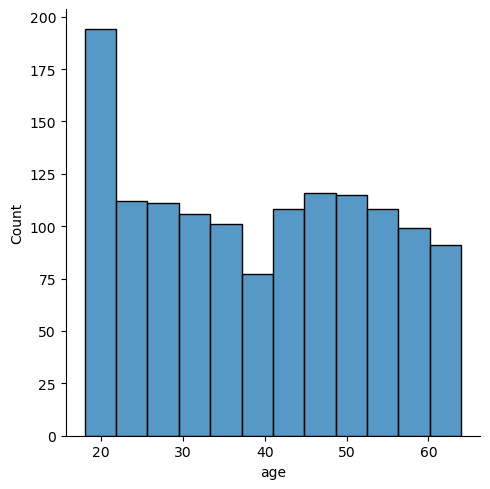

In [14]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='age')

<Figure size 300x300 with 0 Axes>

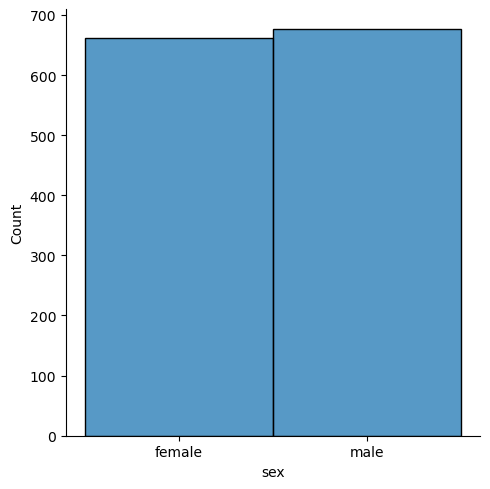

In [15]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='sex')

<Figure size 300x300 with 0 Axes>

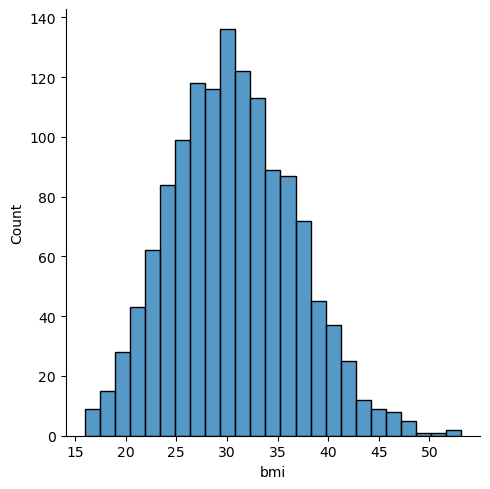

In [16]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='bmi')

# Distribution of charges:-

<Axes: xlabel='charges', ylabel='Density'>

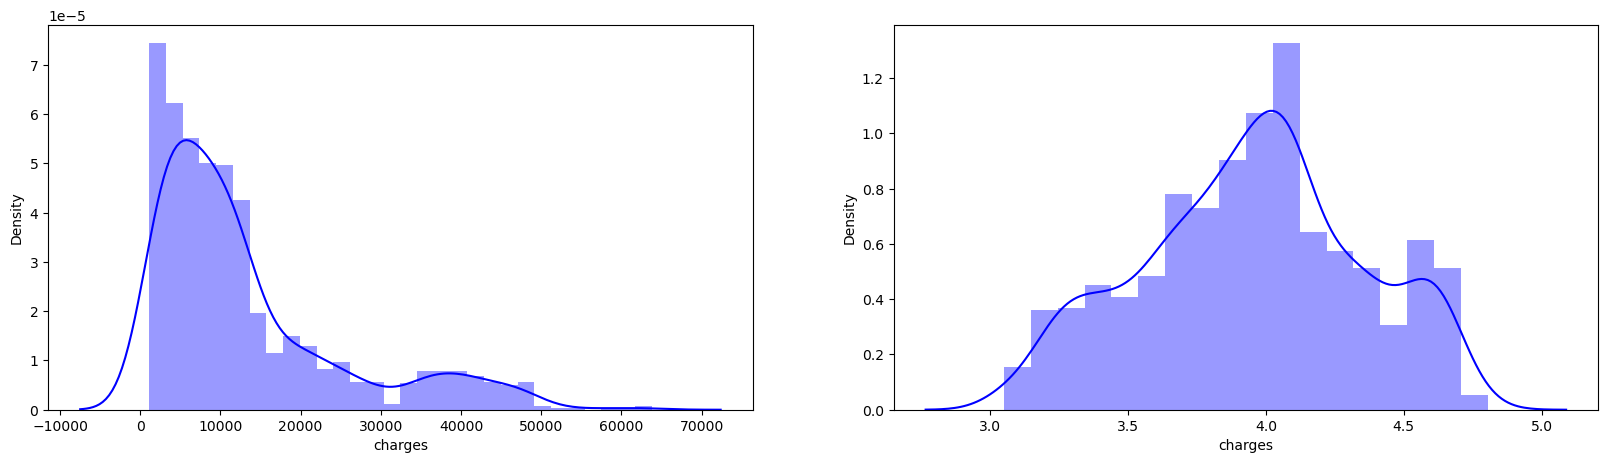

In [17]:
#Distribution of charges:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges,color='b')

#Natural log for approximately normal distribution:
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges),color='b')

# Visualizing distribution of numerical variables vs medical charges

Text(0.5, 1.0, 'Distribution of BMI')

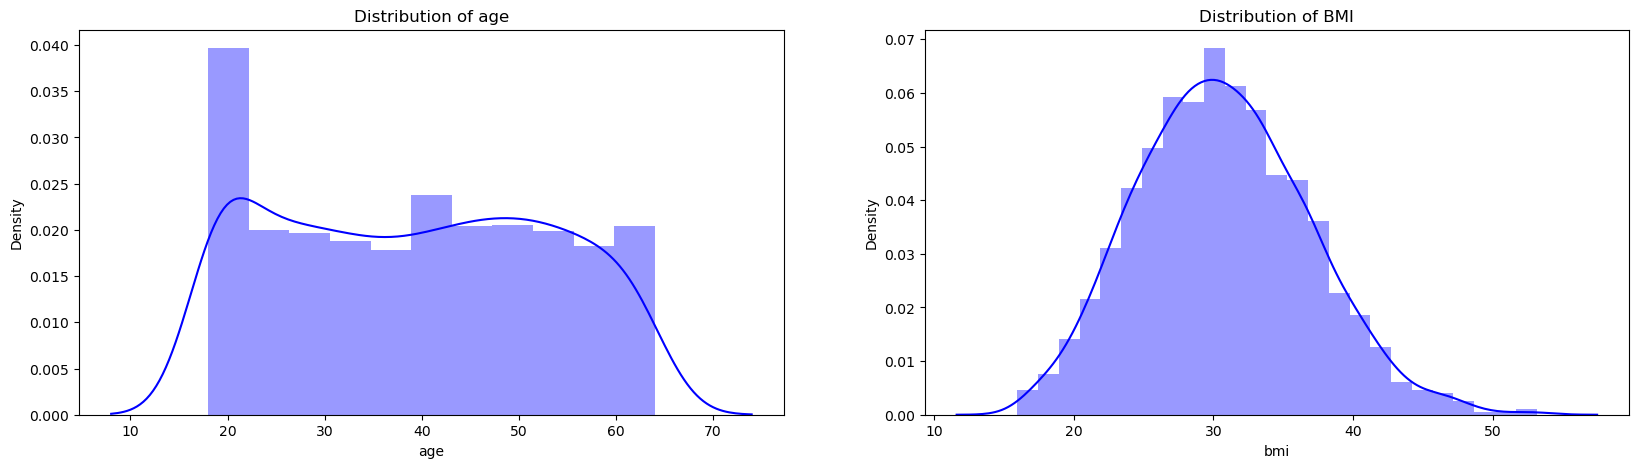

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.age,color='b').set_title('Distribution of age')

plt.subplot(1,2,2)
sns.distplot(df.bmi,color='b').set_title('Distribution of BMI')

# Countplot:-

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

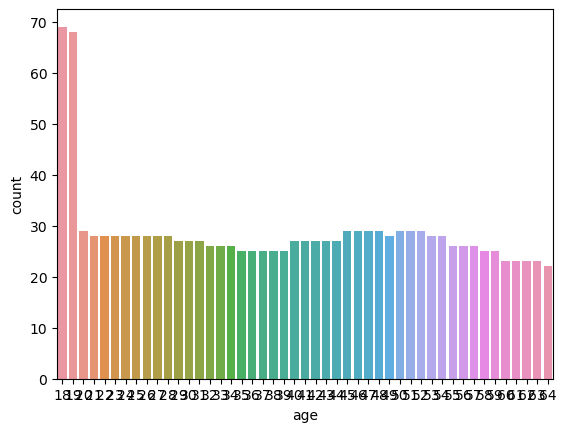

In [19]:
sns.countplot(x='age',data=df)
df['age'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

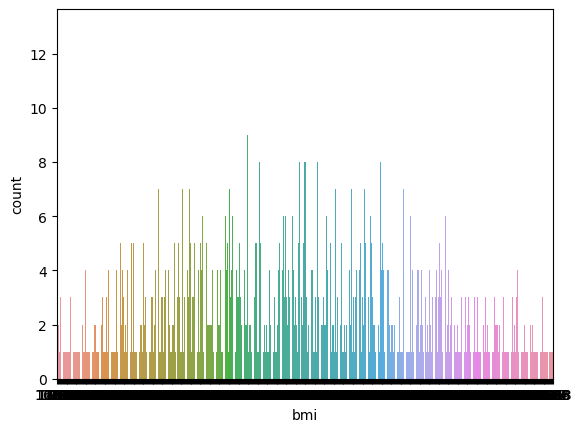

In [20]:
sns.countplot(x='bmi',data=df)
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

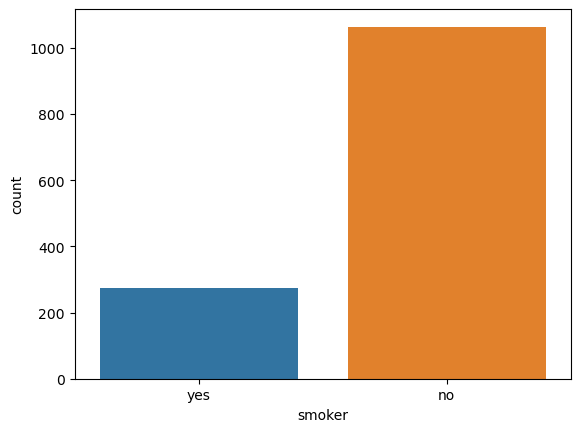

In [21]:
sns.countplot(x='smoker',data=df)
df['bmi'].value_counts()

age            Axes(0.125,0.712609;0.168478x0.167391)
bmi         Axes(0.327174,0.712609;0.168478x0.167391)
children    Axes(0.529348,0.712609;0.168478x0.167391)
charges     Axes(0.731522,0.712609;0.168478x0.167391)
dtype: object

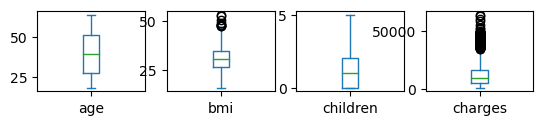

In [22]:
df.plot(kind='box',subplots=True,layout=(4,4),sharex=False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

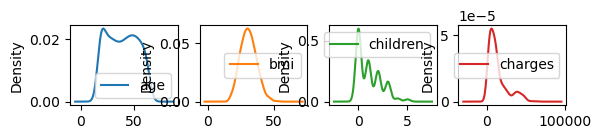

In [23]:
df.plot(kind='density',subplots=True,layout=(4,4),sharex=False)

# Visualizing categorical variables individually vs medical charges:-

<Axes: xlabel='region', ylabel='charges'>

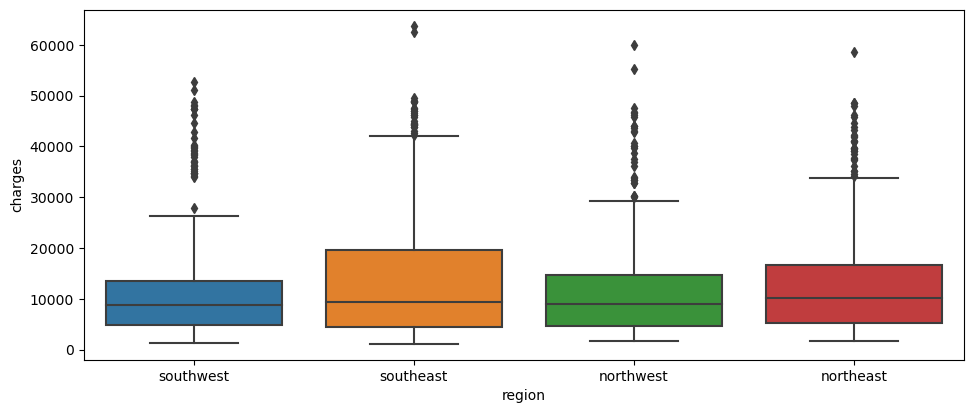

In [24]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.boxplot(x='region',y='charges',data=df)

<Axes: xlabel='children', ylabel='charges'>

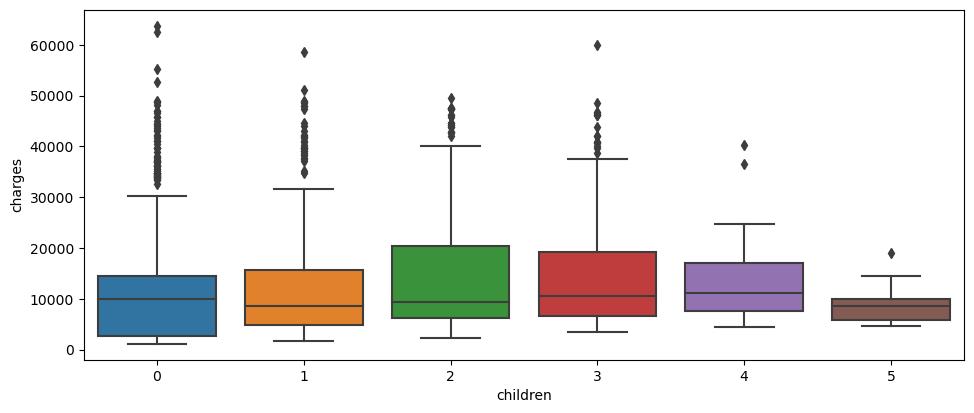

In [25]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,2)
sns.boxplot(x='children',y='charges',data=df)

<Axes: xlabel='sex', ylabel='charges'>

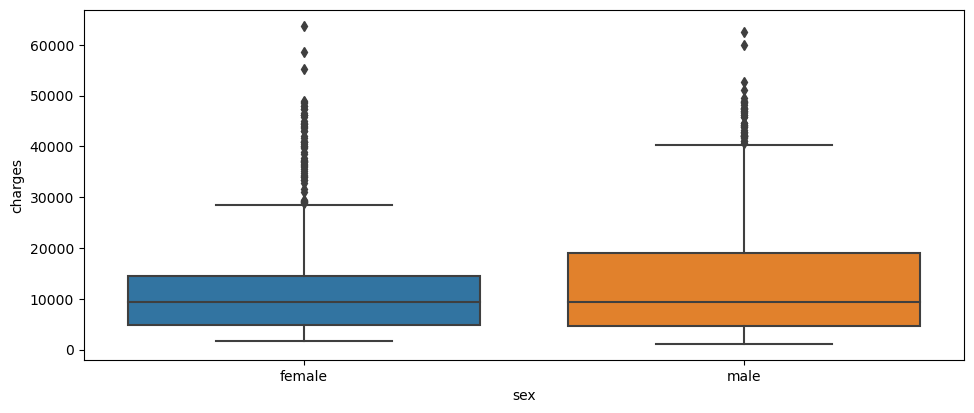

In [26]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,3)
sns.boxplot(x='sex',y='charges',data=df)

<Axes: xlabel='smoker', ylabel='charges'>

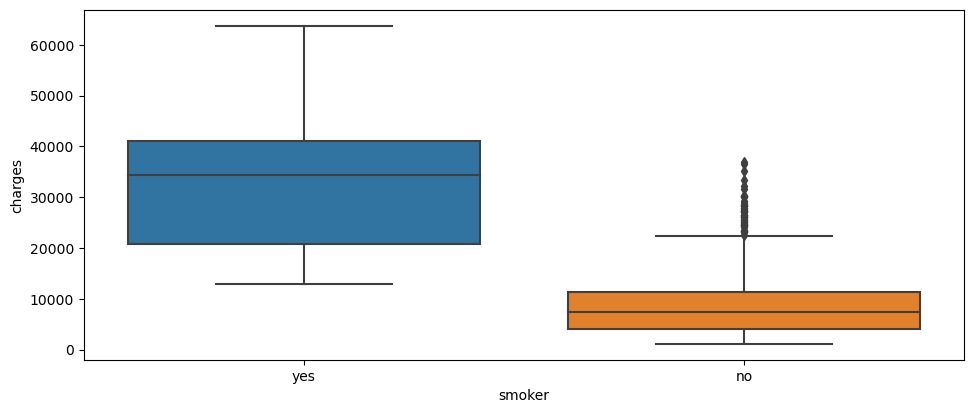

In [27]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,4)
sns.boxplot(x='smoker',y='charges',data=df)

Based on the box plots above,we can derive some inferences on the categorical variables:

1] Region: Compared to all regions, Southeast region has the highest data distribution between the 50th and 75th percentile.
2] Children: Among all the others, individuals with 2 children have the highest distribution between the 50th and 75th percentile.
3] Gender: The data is little bit biased towards males as the interquartile range for male is higher compare to that for female.The data representation for male to female is 50.5 to 49.5.
4] Smoking behavior: Approximately 21% of our data comprises of smokers.The median is high for smokers, in comparison to those that do not smoke.
        
Now that we have looked at the effect of individual variables on medical charges.lets look at effect of a combination of factors on medical charges.

# Bi-Variate Analysis

# Charges by region

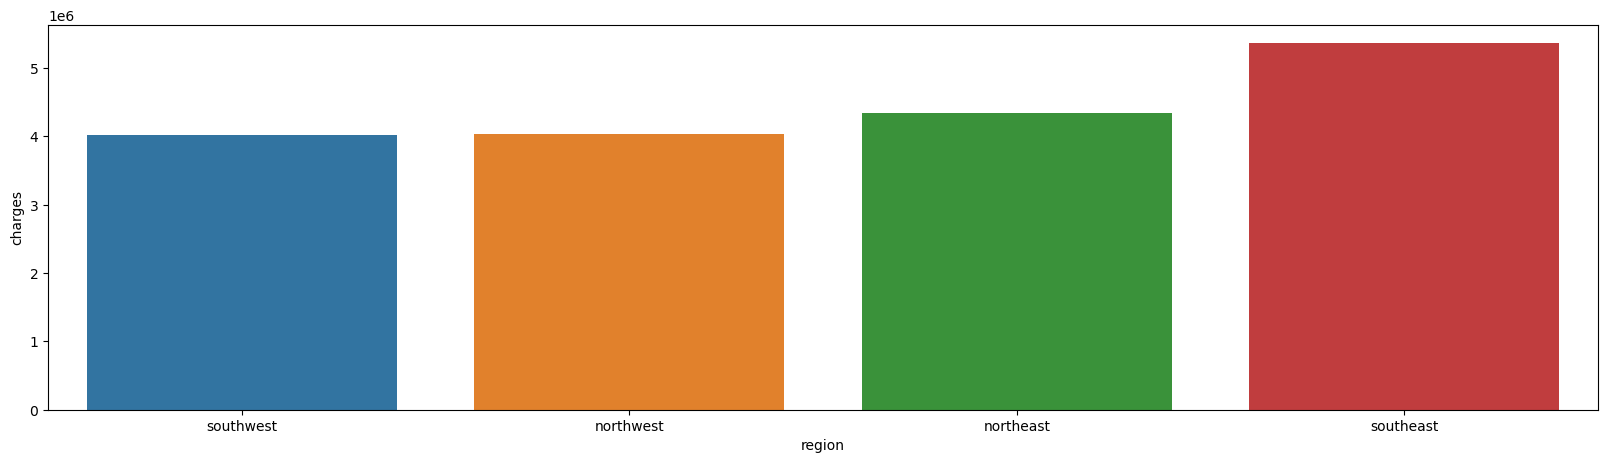

In [28]:
charges=df['charges'].groupby(df.region).sum().sort_values(ascending=True)
plt.figure(figsize=(20,5))
ax=sns.barplot(x=charges.index, y=charges)

The highest amount of charges are in the Southeast while the lowest are in the Southwest. based on this, lets see how charges chnage by region when accounting for other factors,such as number of children,gender,and smoking behavior.

# Charges by region and number of children:

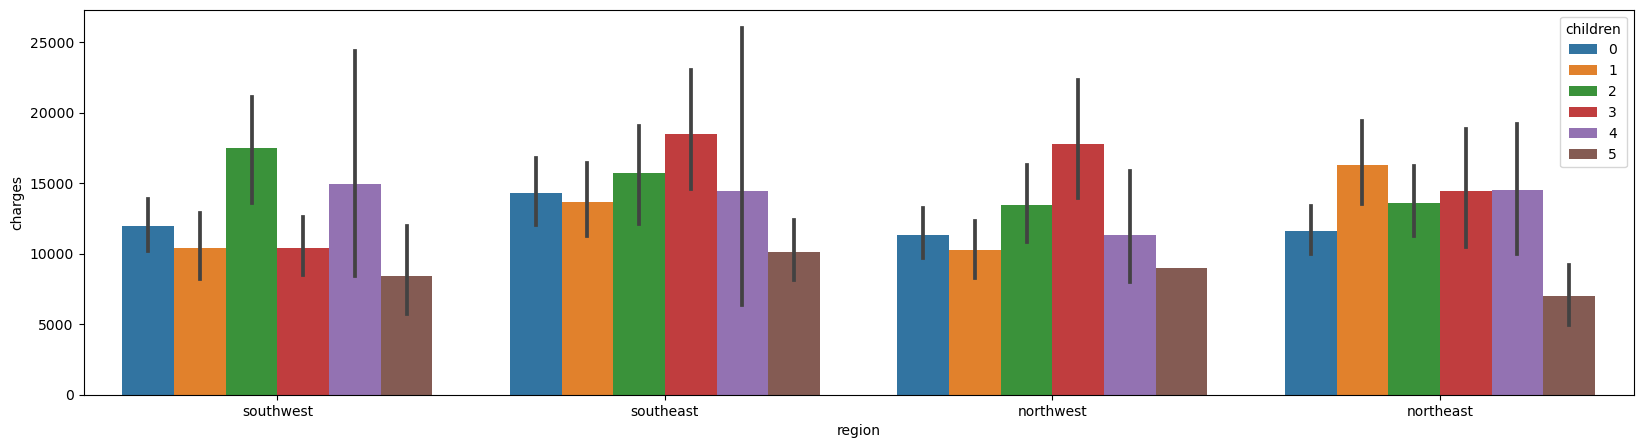

In [29]:
#setting children as hue parameter:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='region',y='charges',hue='children',data=df)

It seens that there is not a statistical differences in terms of how the number of children in a particular region affects charges.

# Charges by region and gender:

<Axes: xlabel='region', ylabel='charges'>

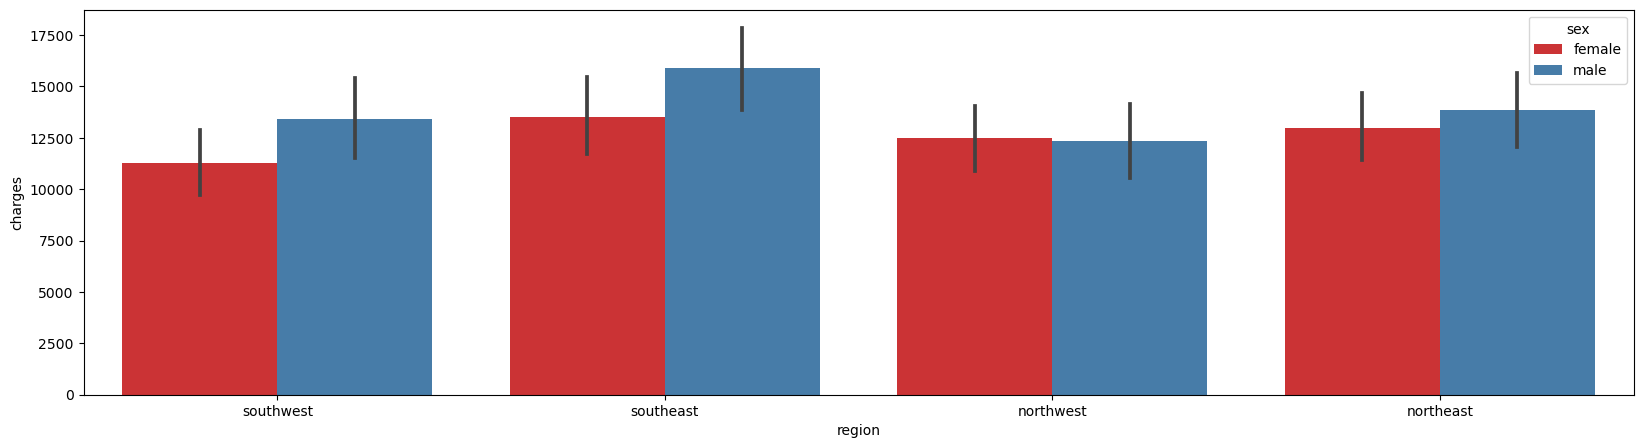

In [30]:
#setting sex as hue parameter:
plt.figure(figsize=(20,5))
sns.barplot(x='region',y='charges',hue='sex',data=df,palette='Set1')

Again, similar to the previous graph,it seems that there is not a statistical difference in terms of how gender in a particular region affects charges.

# Charges by region and smoking behavior:

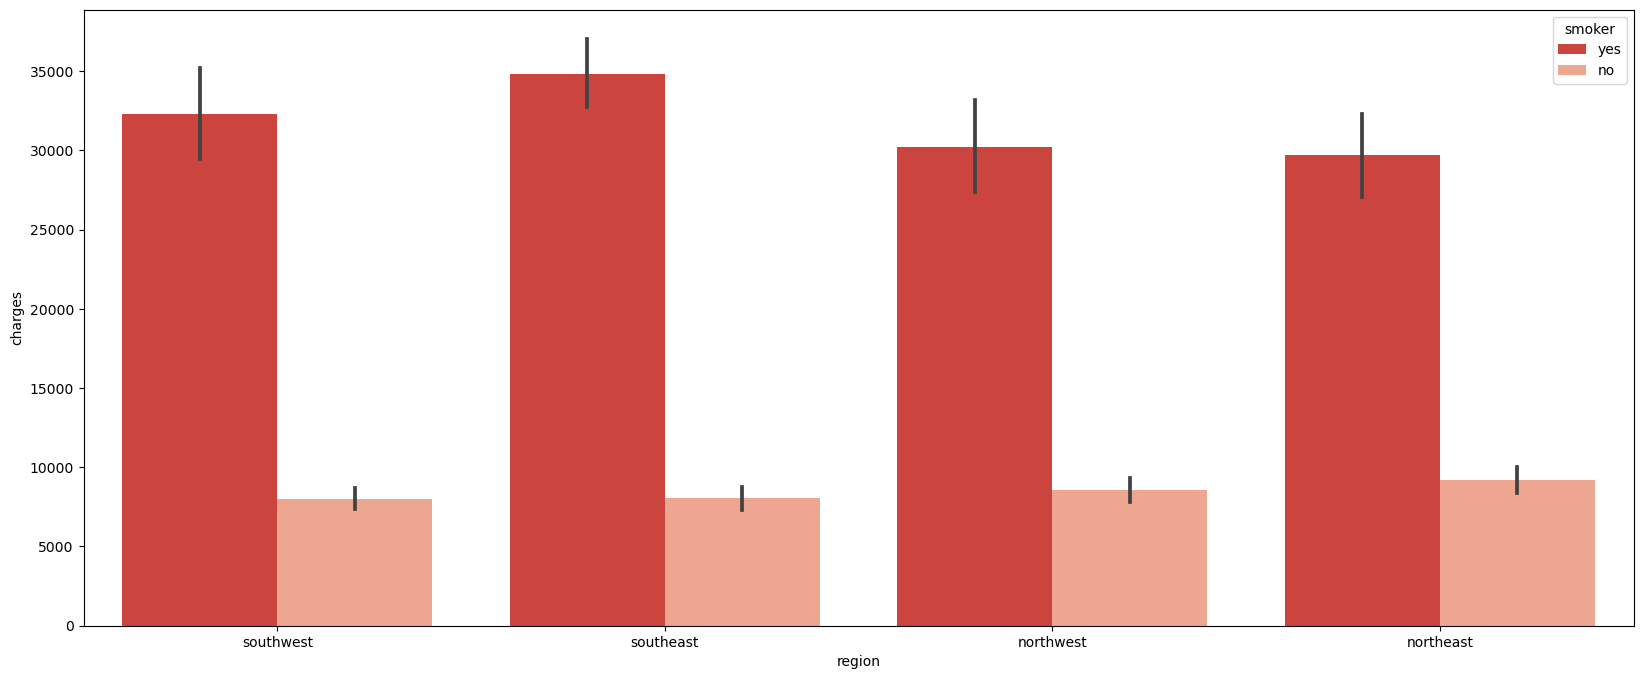

In [31]:
f, ax=plt.subplots(1,1,figsize=(20,8))
ax=sns.barplot(x='region',y='charges',hue='smoker',data=df,palette='Reds_r')

In contrast to the other factors, there seems to be a statistical significance in terms of how smoking behavior in a region affects charges.

# Charges by age,bmi, and children based on smoking behavior:

Text(0.5, 1.0, 'Age vs Medical Charges')

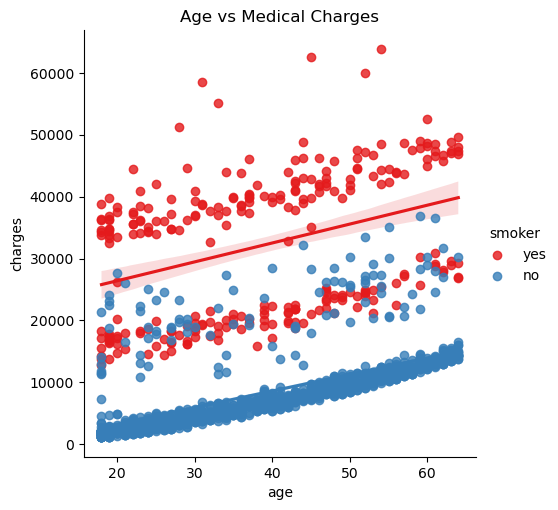

In [32]:
ax=sns.lmplot(x='age',y='charges',data=df,hue='smoker',palette='Set1')
plt.title('Age vs Medical Charges')

Text(0.5, 1.0, 'BMI vs Medical Charges')

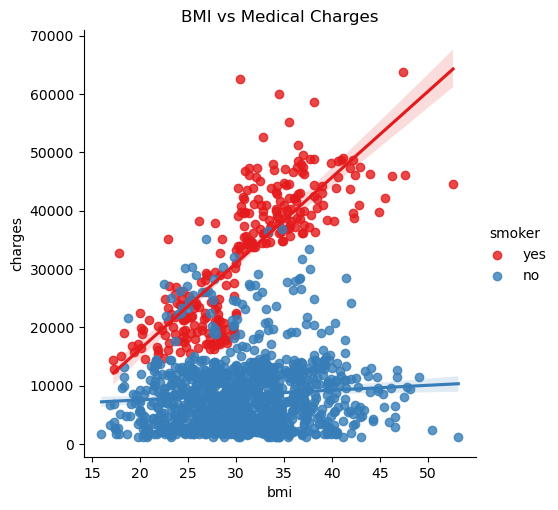

In [33]:
ax=sns.lmplot(x='bmi',y='charges',data=df,hue='smoker',palette='Set1')
plt.title('BMI vs Medical Charges')

Text(0.5, 1.0, 'Number od children vs Medical Charges')

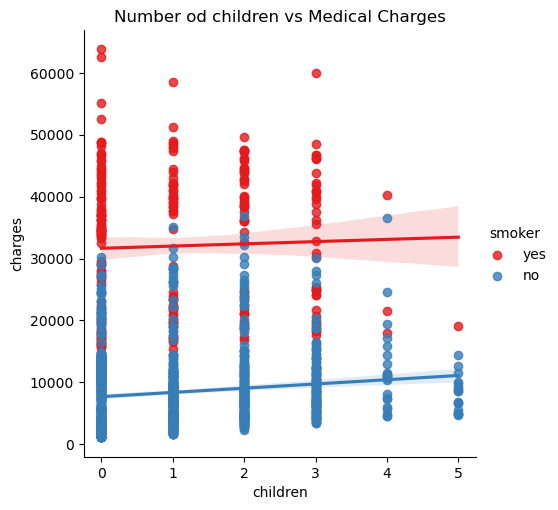

In [34]:
ax=sns.lmplot(x='children',y='charges',data=df,hue='smoker',palette='Set1')
plt.title('Number od children vs Medical Charges')

Based on the analysis,

1] We know that smoking has a great impact on medical costs.
2] Smoking in combination with an increase in other factors, such as age,bmi,and children, further emphasizes and increase the medical cost due to smoking.

# Histogram:-

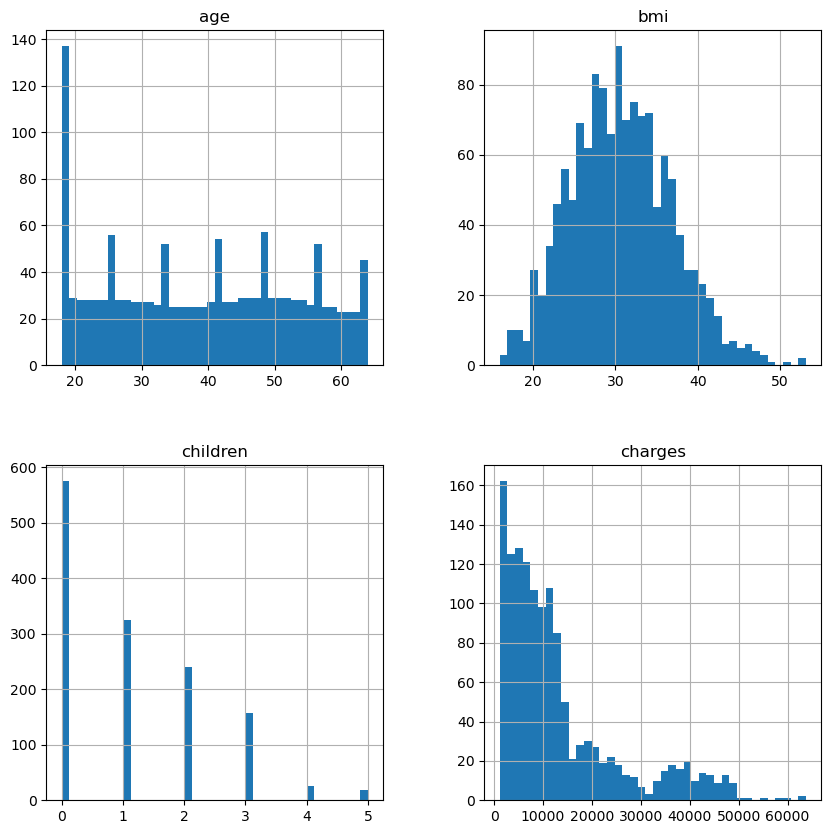

In [35]:
df.hist(figsize=(10,10),bins=40)
plt.show()

# Heatmap for expressing correlation:-

<Axes: >

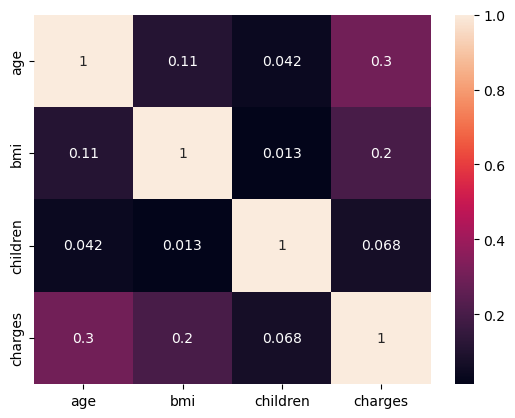

In [36]:
corr=df.corr()
sns.heatmap(corr,annot=True)

# Pair plot:-

<function matplotlib.pyplot.show(close=None, block=None)>

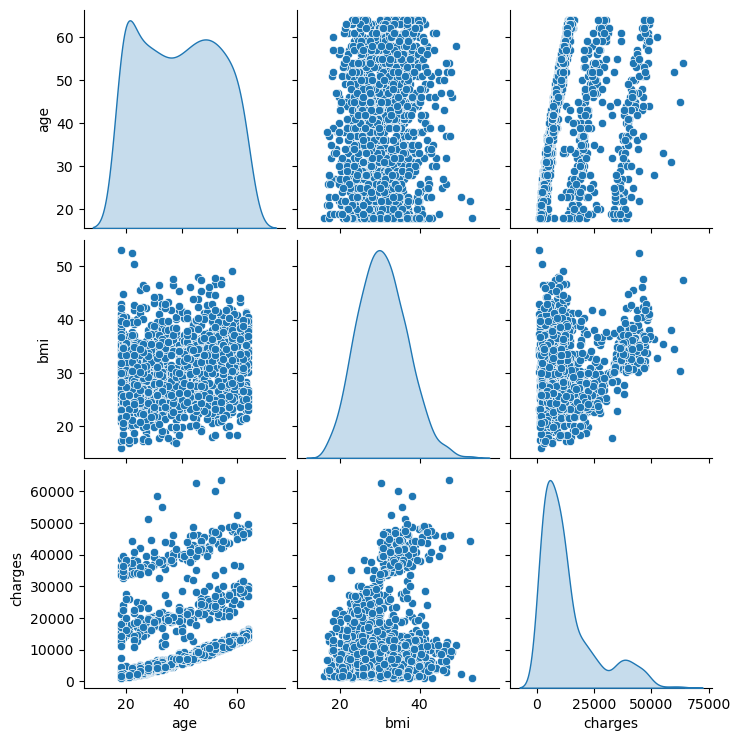

In [37]:
#Pairplot for Age,BMI,Charges

df_num=df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind='kde')
plt.show

# Data Correlation:

In [38]:
#Converting data to categorical type data:
df[['region','sex','smoker']]=df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [39]:
#converting data to numerical type using LabelEncoder:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region= label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex= label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker= label.transform(df.smoker)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

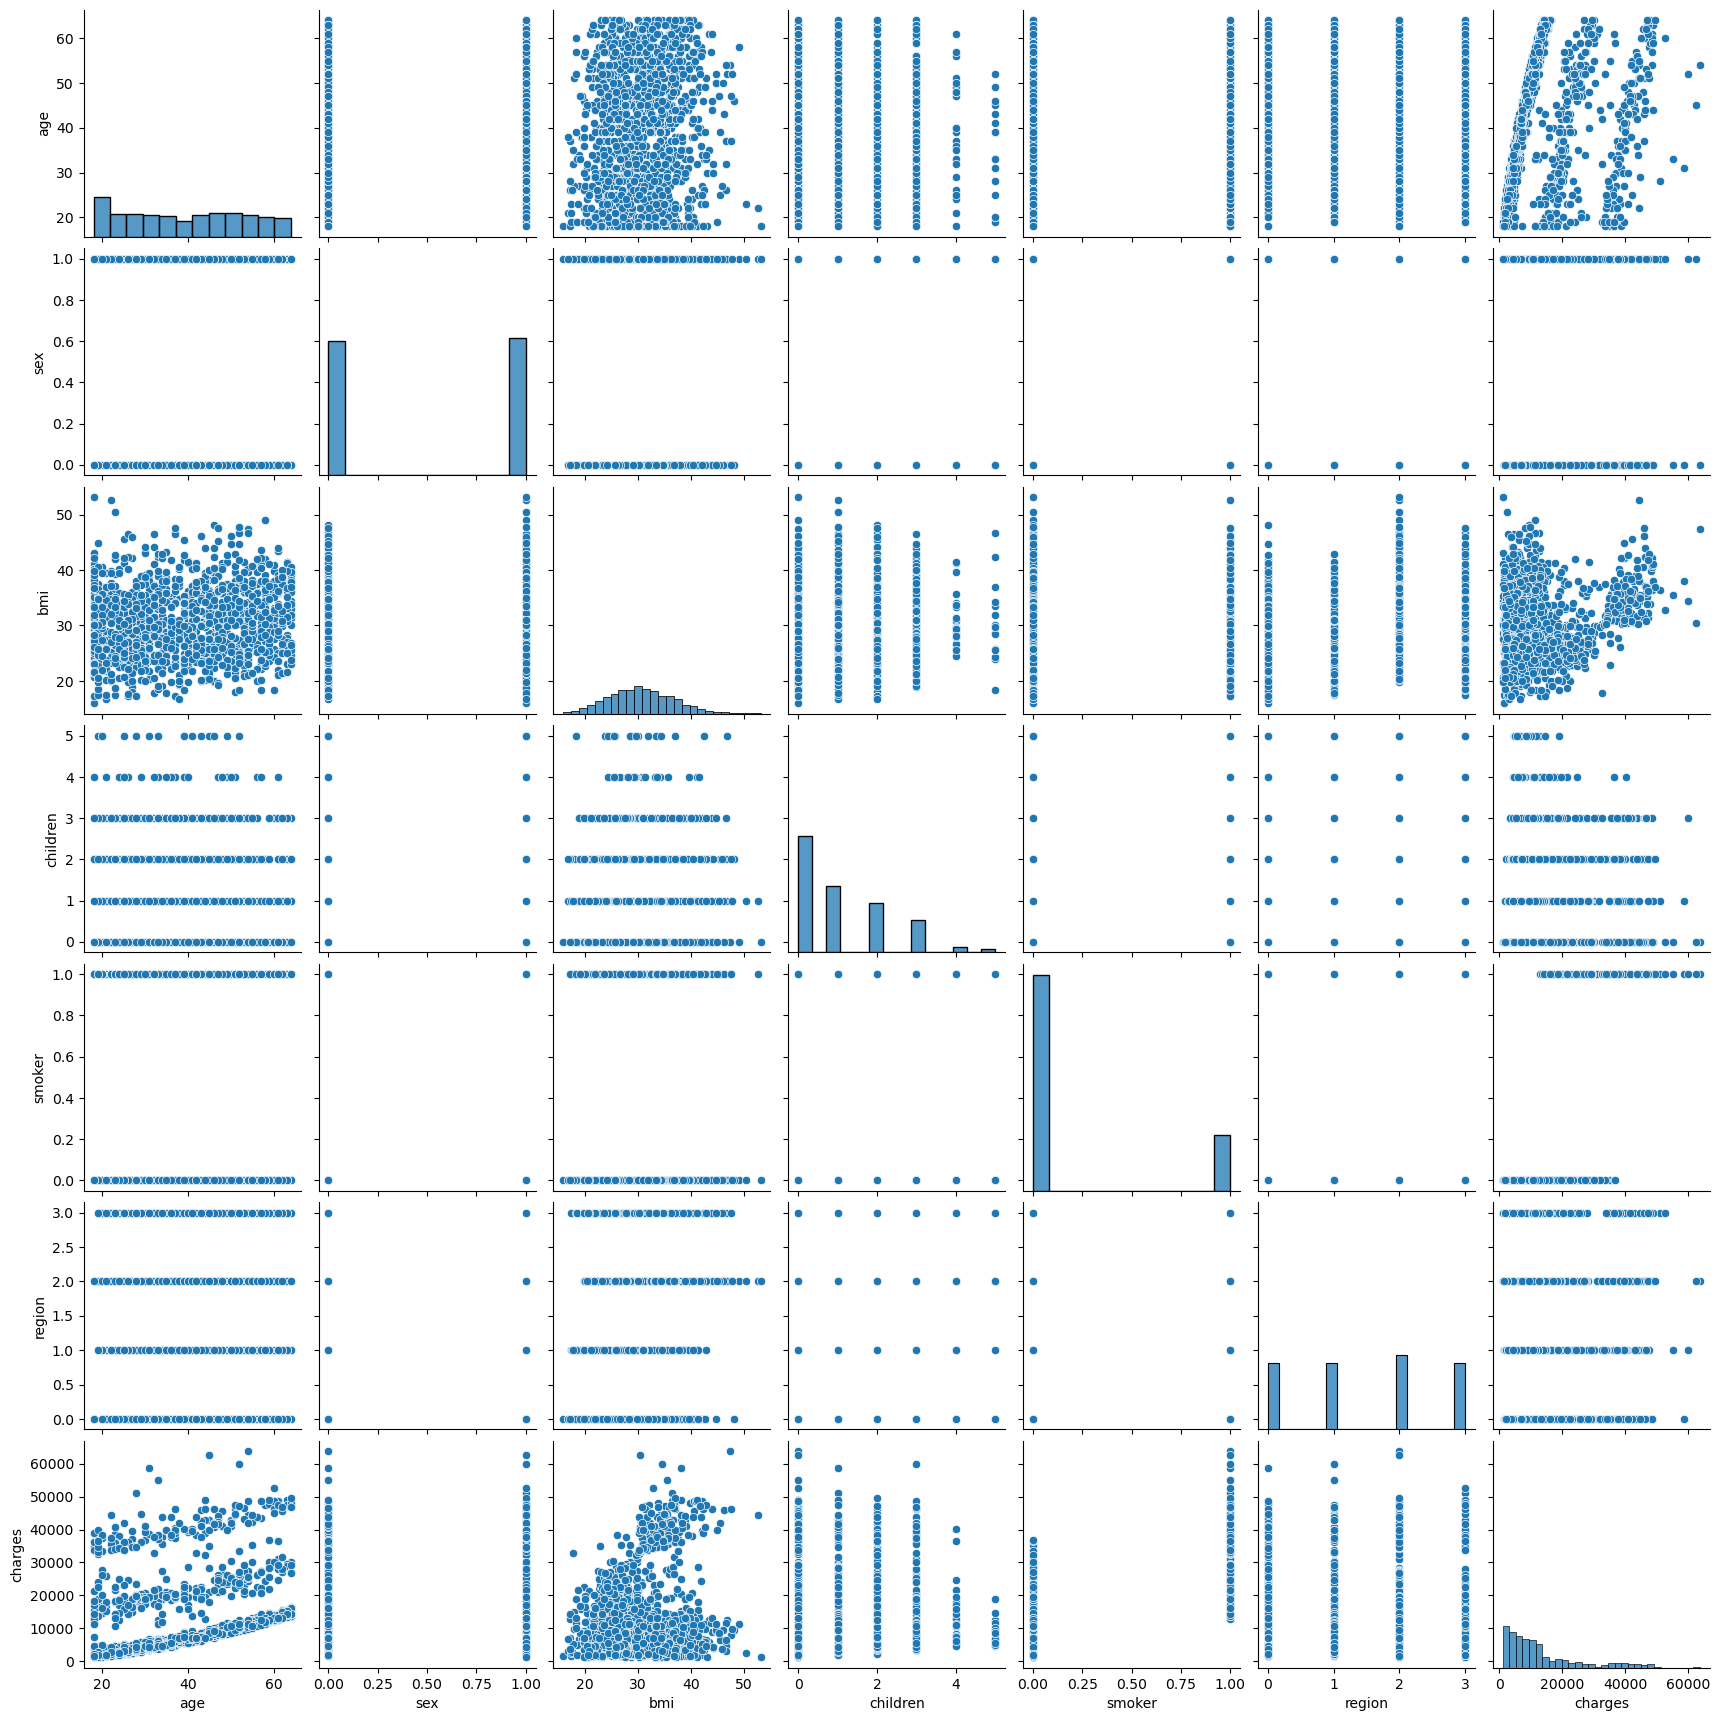

In [40]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

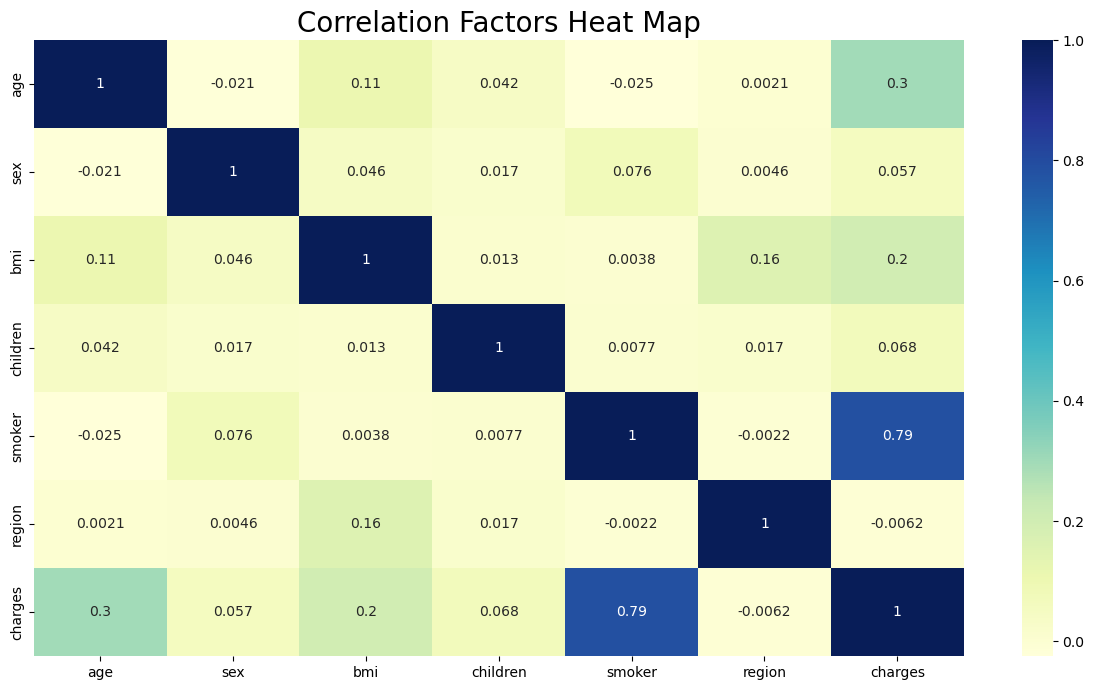

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu').set_title('Correlation Factors Heat Map',size='20')

# Splitting Dataset:-

In [42]:
X=df.drop('charges',axis=1)
y=df['charges']

print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


In [43]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


# Feature Scaling:-

In [44]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X))
x

,0,1,2,3,4,5
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


In [45]:
#import libraries:-
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [47]:
X_train.shape

(1003, 6)

In [48]:
y_train.shape

(1003,)

In [49]:
X_test.shape

(335, 6)

In [50]:
y_test.shape

(335,)

# Model building:-

# Linear Regression:

In [51]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
pred_train=lr.predict(X_train)
print('R2_score:',r2_score(y_test,pred_lr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_score: 0.7668905583460908
R2_score on training data: 74.49087316606229
Mean Absolute Error: 4252.856455792366
Mean Squared Error: 35174149.32705307
Root Mean Squared Error: 5930.779824530082


# Decision Tree Regressor:-

In [52]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred_DTR=DTR.predict(X_test)
pred_train=DTR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_DTR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score: 0.73784834443713
R2_score on training data: 99.87411422200097
Mean Absolute Error: 2879.161938474627
Mean Squared Error: 39556362.083319925
Root Mean Squared Error: 6289.384873206594


# Random forest Regressor:-

In [53]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)
pred_train=rf.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rf))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rf)))

R2_score: 0.8495231889855719
R2_score on training data: 97.57408293907297
Mean Absolute Error: 2579.5404794805977
Mean Squared Error: 22705617.513075437
Root Mean Squared Error: 4765.041186923303


# SVR using linear kernel:-

In [54]:
linear=SVR(kernel='linear')
linear.fit(X_train,y_train)
pred_linear=linear.predict(X_test)
pred_train=linear.predict(X_train)
print('R2_score:',r2_score(y_test,pred_linear))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_linear))
print('Mean Squared Error:',mean_squared_error(y_test,pred_linear))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_linear)))

R2_score: -0.12341933076244516
R2_score on training data: -13.869702866539747
Mean Absolute Error: 6614.071557610144
Mean Squared Error: 169514023.1848846
Root Mean Squared Error: 13019.75511232391


# SVR using poly kernel:-

In [55]:
poly=SVR(kernel='poly')
poly.fit(X_train,y_train)
pred_poly=poly.predict(X_test)
pred_train=poly.predict(X_train)
print('R2_score:',r2_score(y_test,pred_poly))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_poly))
print('Mean Squared Error:',mean_squared_error(y_test,pred_poly))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_poly)))

R2_score: -0.08096100262431483
R2_score on training data: -8.695215034252612
Mean Absolute Error: 8013.221899906629
Mean Squared Error: 163107437.66217172
Root Mean Squared Error: 12771.352225280287


# SVR using rbf kernel:-

In [56]:
rbf=SVR(kernel='rbf')
rbf.fit(X_train,y_train)
pred_rbf=rbf.predict(X_test)
pred_train=rbf.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rbf))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rbf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rbf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rbf)))

R2_score: -0.09590359890482825
R2_score on training data: -9.943877733990547
Mean Absolute Error: 8468.57683106224
Mean Squared Error: 165362143.04508358
Root Mean Squared Error: 12859.321251336853


# KNeighbors Regressor:-

In [57]:
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)
pred_KNN=KNN.predict(X_test)
pred_train=KNN.predict(X_train)
print('R2_score:',r2_score(y_test,pred_KNN))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_KNN))
print('Mean Squared Error:',mean_squared_error(y_test,pred_KNN))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score: 0.17140940292848195
R2_score on training data: 38.46411639511388
Mean Absolute Error: 7656.861539238806
Mean Squared Error: 125026979.54060704
Root Mean Squared Error: 11181.546384136991


# AdaBoostRegressor:-

In [58]:
ABR=AdaBoostRegressor()
ABR.fit(X_train,y_train)
pred_ABR=ABR.predict(X_test)
pred_train=ABR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_ABR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ABR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ABR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ABR)))

R2_score: 0.8015919779658476
R2_score on training data: 82.35817364257852
Mean Absolute Error: 4567.724489236747
Mean Squared Error: 29938012.57126162
Root Mean Squared Error: 5471.56399681678


# GradientBoostingRegressor:-

In [59]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred_GBR=GBR.predict(X_test)
pred_train=GBR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.860394876820149
R2_score on training data: 90.4808306110167
Mean Absolute Error: 2553.998399411577
Mean Squared Error: 21065176.145203844
Root Mean Squared Error: 4589.681486247585


# Predict charges for new customer:-

In [60]:
data={'age':40,
     'sex':1,
     'bmi':40.30,
     'children':4,
     'smoker':1,
     'region':2}
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [61]:
new_pred=GBR.predict(df)
print(new_pred)

[44034.18432546]


# Save model using Joblib:-

In [62]:
#from sklearn.externals import joblib
import joblib

In [63]:
#save the model as a object file:
joblib.dump(GBR,'GBRfile.obj')

['GBRfile.obj']

In [64]:
#Load the model from the file:
GBR_from_joblib=joblib.load('GBRfile.obj')

In [65]:
#Use the loaded model to make predictions:
GBR_from_joblib.predict(df)

array([44034.18432546])